RMSE with baseline boosting: 0.3832

# Hyperparameters

In [2]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset
file_path = "data/flight_data_0-1.csv"
data = pd.read_csv(file_path)

In [4]:
# Inspect the dataset to identify categorical columns
categorical_columns = ['AIRLINE', 'ORIGIN', 'DEST']

# Convert categorical columns to 'category' dtype
data[categorical_columns] = data[categorical_columns].astype('category')

In [5]:
# Separate features and target
X = data.drop(columns=['ARR_DELAY'])
y = data['ARR_DELAY']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Define a list of hyperparameters for different models
params_list = [
    {'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.05, 'n_estimators': 100},
    {'num_leaves': 50, 'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 150},
    {'num_leaves': 100, 'max_depth': 10, 'learning_rate': 0.01, 'n_estimators': 200},
    {'num_leaves': 20, 'max_depth': 7, 'learning_rate': 0.05, 'n_estimators': 100},
    {'num_leaves': 60, 'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 250},
    {'num_leaves': 40, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 300},
    {'num_leaves': 80, 'max_depth': 8, 'learning_rate': 0.05, 'n_estimators': 200},
    {'num_leaves': 120, 'max_depth': 12, 'learning_rate': 0.1, 'n_estimators': 100},
    {'num_leaves': 50, 'max_depth': 6, 'learning_rate': 0.02, 'n_estimators': 150},
    {'num_leaves': 30, 'max_depth': 4, 'learning_rate': 0.08, 'n_estimators': 250},
]

In [7]:
# Initialize a list to store MSE values for each model
mse_values = []

# Train and evaluate models with different hyperparameters
for i, params in enumerate(params_list):
    model = lgb.LGBMRegressor(boosting_type='gbdt', objective='binary', random_state=42, **params)
    
    # Train the model
    model.fit(X_train, y_train, categorical_feature=categorical_columns)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

[LightGBM] [Info] Number of positive: 142038, number of negative: 536213
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 678251, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.209418 -> initscore=-1.328437
[LightGBM] [Info] Start training from score -1.328437
[LightGBM] [Info] Number of positive: 142038, number of negative: 536213
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 678251, number of used features: 11
[LightGBM] [

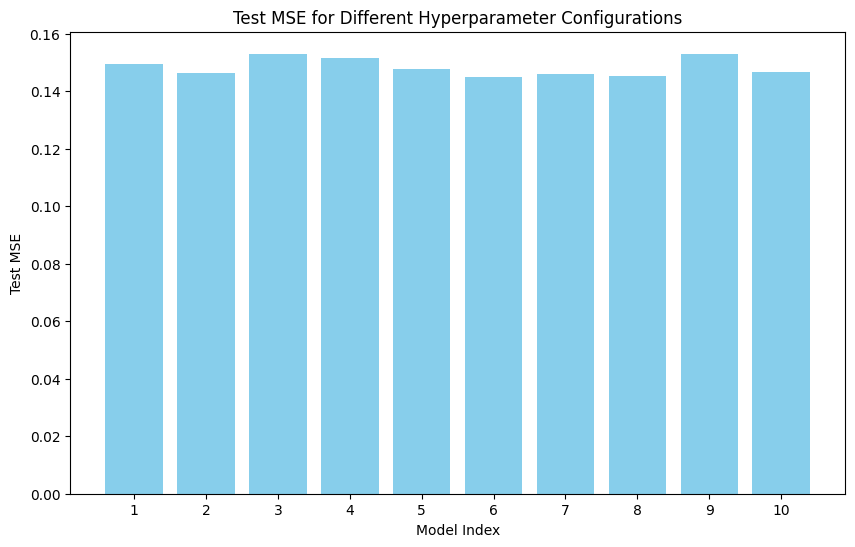

Model 1 Test MSE: 0.1496
Model 2 Test MSE: 0.1463
Model 3 Test MSE: 0.1530
Model 4 Test MSE: 0.1516
Model 5 Test MSE: 0.1476
Model 6 Test MSE: 0.1449
Model 7 Test MSE: 0.1459
Model 8 Test MSE: 0.1454
Model 9 Test MSE: 0.1529
Model 10 Test MSE: 0.1467


In [8]:
# Plot the MSE values of the 10 models
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), mse_values, color='skyblue')
plt.xlabel('Model Index')
plt.ylabel('Test MSE')
plt.title('Test MSE for Different Hyperparameter Configurations')
plt.xticks(range(1, 11))
plt.show()

# Print the MSE values for each model
for i, mse in enumerate(mse_values):
    print(f"Model {i+1} Test MSE: {mse:.4f}")

In [9]:
#Best hyperparameters: {'num_leaves': 40, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 300}

# Cross Validation

In [10]:
# Define the model with the best hyperparameters
model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    objective='binary', 
    num_leaves=40,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=300,
    random_state=42
)

[LightGBM] [Info] Number of positive: 141940, number of negative: 536311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1146
[LightGBM] [Info] Number of data points in the train set: 678251, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.209274 -> initscore=-1.329310
[LightGBM] [Info] Start training from score -1.329310
[LightGBM] [Info] Number of positive: 141920, number of negative: 536331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 678251, number of used features: 11
[LightGBM] [

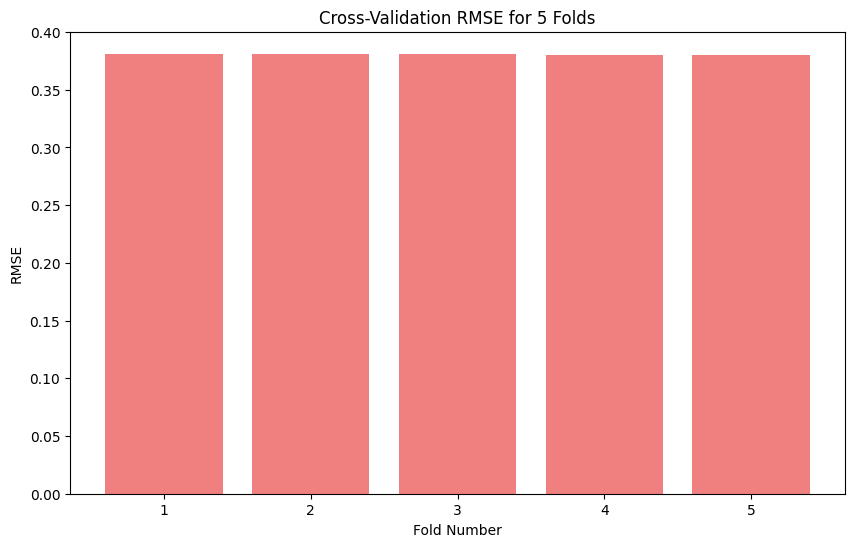

In [11]:
# Perform cross-validation with 5-fold
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and calculate RMSE
rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation results
print(f"Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Mean Cross-Validation RMSE: {rmse_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation RMSE: {rmse_scores.std():.4f}")

# Plot the RMSE scores for each fold
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), rmse_scores, color='lightcoral')
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE for 5 Folds')
plt.xticks(range(1, 6))
plt.show()